# Loss Functions

## Parametrized Models
Many machine learning models can be written in the form  
$$
\hat{y} = g(x, \theta),
$$
where the function $g$ specifies the model structure and $\theta$ is a set of learnable parameters.

For example, in linear regression:
$$
\hat{y} = g(x, \theta) = \theta_1 x_1 + \dots + \theta_d x_d.
$$

Choosing a specific parameter vector $\theta$ based on training data  
$(x_1, y_1), \dots, (x_n, y_n)$  
is called *training* or *fitting* the model.

In the linear regression case, we typically choose $\theta$ by minimizing the least-squares objective:
$$
\sum_{i=1}^n (\hat{y}_i - y_i)^2
= \sum_{i=1}^n (g(x_i, \theta) - y_i)^2.
$$

## Loss Function
A **loss function**  
$$
l(\hat{y}, y) : \mathbb{R}^{m} \times \mathbb{R}^{m} \to \mathbb{R}
$$
quantifies how close the prediction $\hat{y}$ is to the true value $y$.  
It measures how well the model fits the data.

We first define the **residuals**:
$$
r = \hat{y} - y,
$$
i.e., the difference between predicted and observed values.  
(Note: Some literature uses the opposite sign $y - \hat{y}$.)

Examples of common loss functions:

- **Quadratic loss:**  
  $$
  l(\hat{y}, y) = (\hat{y} - y)^2
  $$
- **Absolute loss:**  
  $$
  l(\hat{y}, y) = |\hat{y} - y|
  $$

The **empirical risk** is the average loss over all data points:
$$
\mathcal{L}(\theta)
= \frac{1}{n}\sum_{i=1}^n l(\hat{y}_i, y_i)
= \frac{1}{n}\sum_{i=1}^n l(g(x_i, \theta), y_i).
$$

Finding the optimal parameters $\theta$ by minimizing empirical risk is known as **empirical risk minimization (ERM)**.



The text above provided a short recap of the slides.  
Below, we load a dataset on which we will train regression models with different loss functions and observe how the predictions change depending on the chosen loss function.


## Quantile Regression
As the first example of an asymmetric loss, we will use **quantile regression**.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

We begin by generating a heteroscedastic dataset, i.e., data with **non-constant variance**, where the variance of the noise increases with the values of $x$.

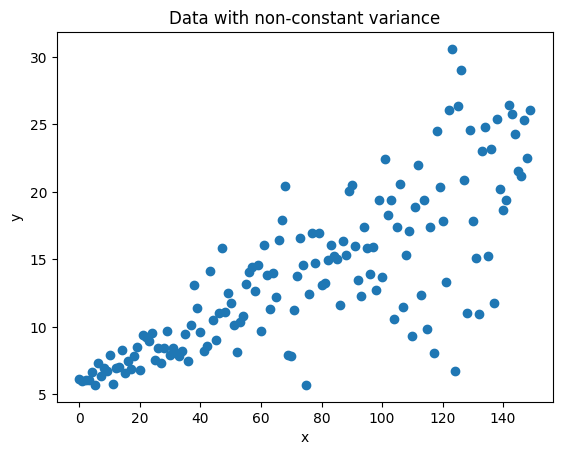

In [3]:
## Generate some data with non-constant variance
np.random.seed(1)
x_ = np.arange(150).reshape(-1,1)
intercept_ = 6
slope_ = 0.1
## Non constant variance
var_ = 0.1 + 0.05 * x_
## non constant error
error_ = np.random.normal(size = (x_.size,1), loc = 0.0, scale = var_)
## Regression equation
y_ = intercept_ + slope_ * x_ + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Data with non-constant variance")

In the cell below, we fit a linear regression model and visualize the resulting fit.


Mean squared error: 13.16
Variance score: 0.62


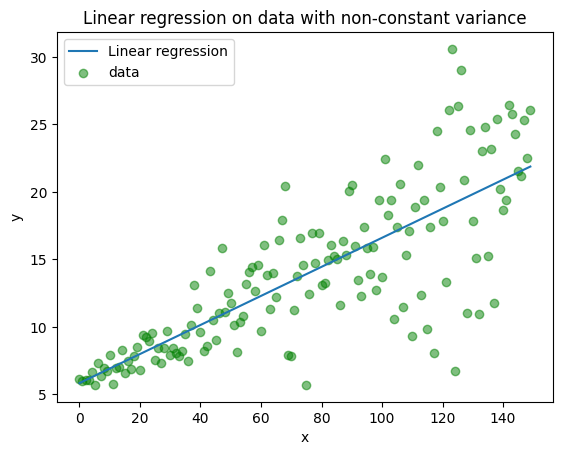

In [4]:
## Try to fit a linear regression
model_LR = LinearRegression(fit_intercept = True)
model_LR.fit(x_, y_)

y_pred_lin_reg = model_LR.predict(x_)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred_lin_reg - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model_LR.score(x_, y_)))

## Plot the regression
plt.figure(4)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_, y_pred_lin_reg, label="Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
plt.legend()
_ = plt.title("Linear regression on data with non-constant variance")

Below, we fit a quantile regression model with $\tau = 0.5$ to the heteroscedastic data and again visualize the fitted line.


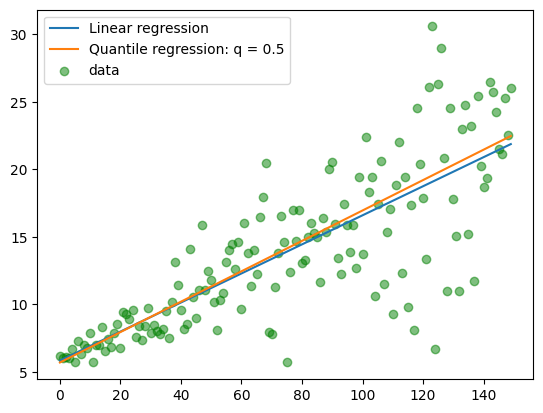

In [5]:
from sklearn.linear_model import QuantileRegressor
qr = QuantileRegressor(quantile=0.5, alpha=0, solver = "highs")
y_pred_qr = qr.fit(x_, y_.flatten()).predict(x_)


plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.plot(x_, y_pred_qr, label=f"Quantile regression: q = 0.5")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

We can see that the fitted lines are almost identical.  
Now, compare the RMSE (`root_mean_squared_error`)
and the MAE (`mean_absolute_error`) of the two models.

Which model has a lower RMSE?  
Which model has a lower MAE?

Your task here is to compute the RMSE and MAE for the predictions of the linear regression (LR) model and the quantile regression (QR) model.

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

print(f"RMSE LR: {root_mean_squared_error(y_pred_lin_reg, y_):.3f} MAE LR: {root_mean_squared_error(y_pred_lin_reg, y_):.3f}")
print(f"RMSE QR: {root_mean_squared_error(y_pred_qr, y_):.3f} MAE QR: {root_mean_squared_error(y_pred_qr, y_):.3f}")
print("Model with lowest MSE: MODEL_NAME, model with lowest MAE: MODEL_NAME")

RMSE LR: 3.628 MAE LR: 3.628
RMSE QR: 3.642 MAE QR: 3.642
Model with lowest MSE: MODEL_NAME, model with lowest MAE: MODEL_NAME


Using quantile regression, we can estimate lines that split the response values according to a chosen quantile $\tau$.  
Below, we show examples for $\tau = 0.1$ and $\tau = 0.9$, which together bound approximately 80% of the data.


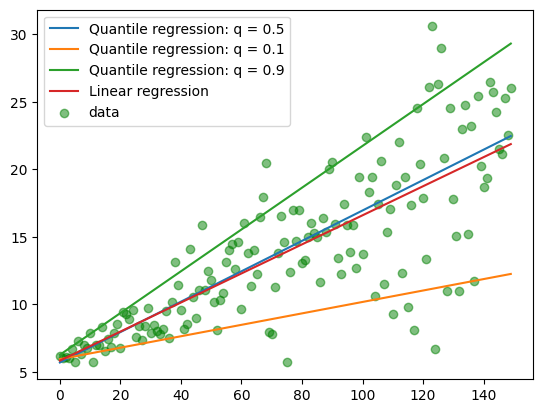

In [7]:
qr_10 = QuantileRegressor(quantile=0.1, alpha=0, solver = "highs") # 0.1 quantile regression
qr_90 = QuantileRegressor(quantile=0.9, alpha=0, solver = "highs") # 0.9 quantile regression
y_pred_10 = qr_10.fit(x_, y_.reshape(-1)).predict(x_)
y_pred_90 = qr_90.fit(x_, y_.reshape(-1)).predict(x_)

plt.plot(x_, y_pred_qr, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_10, label=f"Quantile regression: q = 0.1")
plt.plot(x_, y_pred_90, label=f"Quantile regression: q = 0.9")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

Now, try to add the lines that cover 90% of the $y$ values to the plot, i.e., the 90% confidence interval for the response.  
To obtain these lines, choose the appropriate values of the quantile parameter $\tau$ in the quantile regression models.  
Finally, compute the corresponding quantile regression lines and plot them together with the data.


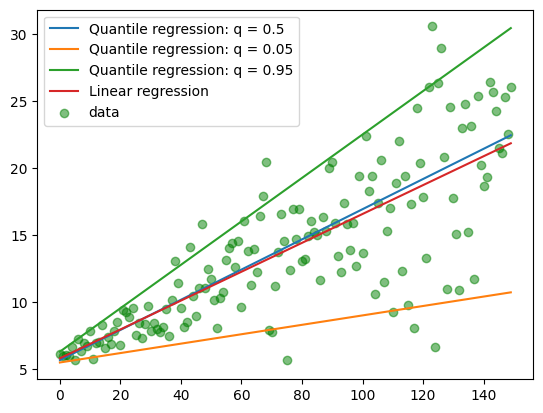

In [8]:
qr_05 =  QuantileRegressor(quantile=0.05, alpha=0, solver = "highs")
qr_95 =  QuantileRegressor(quantile=0.95, alpha=0, solver = "highs")
y_pred_05 = qr_05.fit(x_, y_.reshape(-1)).predict(x_)
y_pred_95 = qr_95.fit(x_, y_.reshape(-1)).predict(x_)

plt.plot(x_, y_pred_qr, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_05, label=f"Quantile regression: q = 0.05")
plt.plot(x_, y_pred_95, label=f"Quantile regression: q = 0.95")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

Good job! Approximately 90% of the data should lie between the green and orange lines.

**Optional task:**  
If you have some time left, try adding more quantile regression estimates to obtain an approximate distribution of the data across multiple quantiles.


In [ ]:
# more q's with plot

Now, let us check the plots of histograms.

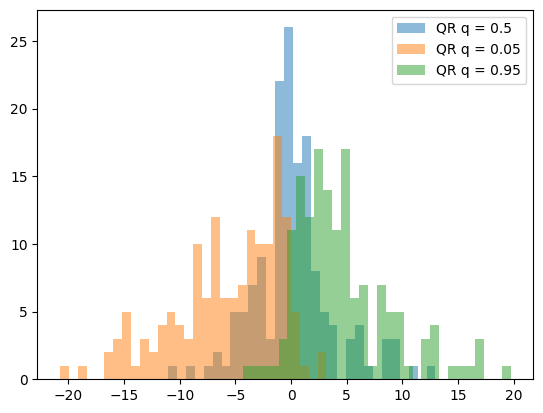

In [9]:
plt.hist(y_pred_qr - y_.flatten(), bins = 30, alpha =0.5, label = 'QR q = 0.5')
plt.hist(y_pred_05 - y_.flatten(), bins = 30, alpha =0.5, label = 'QR q = 0.05')
plt.hist(y_pred_95 - y_.flatten(), bins = 30, alpha =0.5, label = 'QR q = 0.95')
# plt.hist(y_ - y_pred_lin_reg, bins = 30, alpha =0.5, label = 'Linear regression')
plt.legend(loc='upper right')
plt.show()

Below, change the value of `your_quantile` to observe how the distribution of residuals changes.

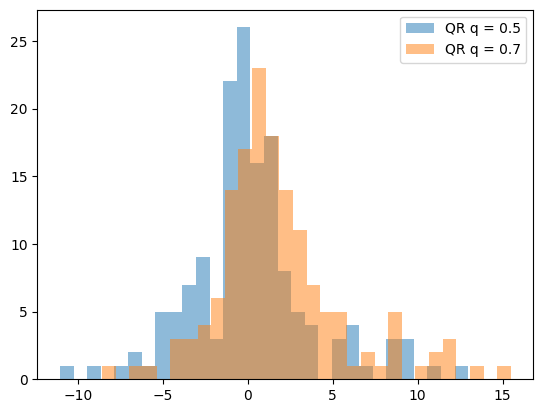

In [11]:
your_quantile = 0.7
qr_custom = QuantileRegressor(quantile=your_quantile, alpha=0, solver = "highs")
y_pred_q_custom = qr_custom.fit(x_, y_.reshape(-1)).predict(x_)

plt.hist(y_pred_qr - y_.flatten(), bins = 30, alpha =0.5, label = 'QR q = 0.5')
plt.hist(y_pred_q_custom - y_.flatten(), bins = 30, alpha =0.5, label = f"QR q = {your_quantile}")

plt.legend(loc='upper right')
plt.show()

## Huber Regression
In this part, we will use regression with the **Huber loss function**, which combines the squared loss for small residuals and the absolute loss for large residuals, controlled by the parameter $\epsilon$.

The Huber loss is defined as:

$$
L_{\epsilon}(r) =
\begin{cases}
r^{2}, & \text{if } |r| < \epsilon, \\
\epsilon \,(2|r| - \epsilon), & \text{otherwise}.
\end{cases}
$$


Plot of squared error (SE) vs Huber loss:

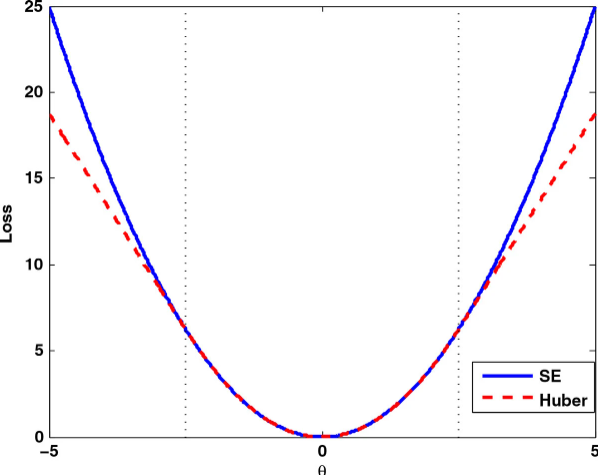

Source of plot: https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-8-S3-S1/figures/9

In [12]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

The example below is adapted from the  
[Machine Learning Mastery blog](https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/).  
First, create a function that generates data with outliers.

In [13]:
def get_dataset():
  X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
  # add some artificial outliers
  np.random.seed(1)
  for i in range(10):
    factor = np.random.randint(2, 4)
    if np.random.random() > 0.5:
      X[i] += factor * X.std()
    else:
      X[i] -= factor * X.std()
  return X, y

Often, when we encounter outliers in a dataset, we treat them as incorrect values and either remove or replace them. However, doing so may cause us to discard important observations.  
An alternative approach is to use **robust loss functions**, which are less sensitive to outliers than, for example, the squared loss.

First, we define a function `evaluate_model` that uses repeated k-fold cross-validation to evaluate a model.  
We use 3 folds and repeat the evaluation multiple times to obtain more model performance samples and therefore more reliable results.


In [14]:
# evaluate a model
def evaluate_model(X, y, model):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
 return np.abs(scores)

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
 # fut the model on all data
 model.fit(X, y)
 # plot the dataset
 plt.scatter(X, y)
 # plot the line of best fit
 xaxis = np.arange(X.min(), X.max(), 0.01)
 yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
 plt.plot(xaxis, yaxis, color='r')
 # show the plot
 plt.title(type(model).__name__)
 plt.show()

First, we fit the model using linear regression and plot the results.

Mean MAE 5.030, (std:1.408)


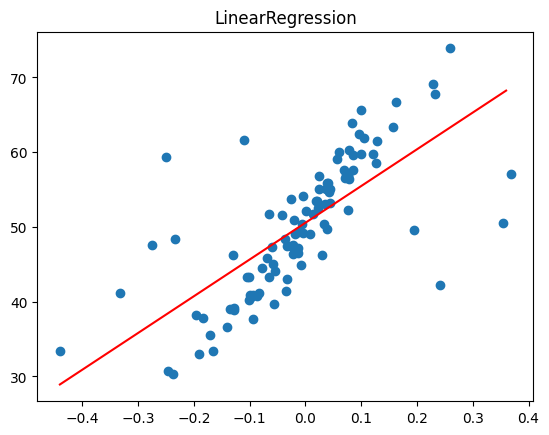

In [15]:
# load dataset
X, y = get_dataset()

model_LR = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model_LR)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_LR)

In the cell below, create a new instance of `HuberRegressor` with the parameter `epsilon` set to 1, which defines the boundary between the quadratic and linear regions of the Huber loss.  
Set `alpha = 0` to disable regularization.  

The Huber loss is an example of a loss function that is robust to outliers.


Mean MAE 4.357, (std:1.859)


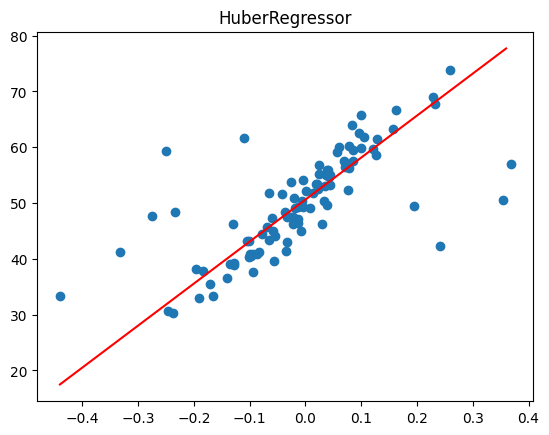

In [16]:

# define the model by calling the constructor
model_HR = HuberRegressor()
# evaluate model by calling the  evaluate_model function
results = evaluate_model(X, y, model_HR)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_HR)

Finally, you can fit a `QuantileRegressor` model and compare its results to the Huber regressor.

Mean MAE 4.280, (std:1.929)


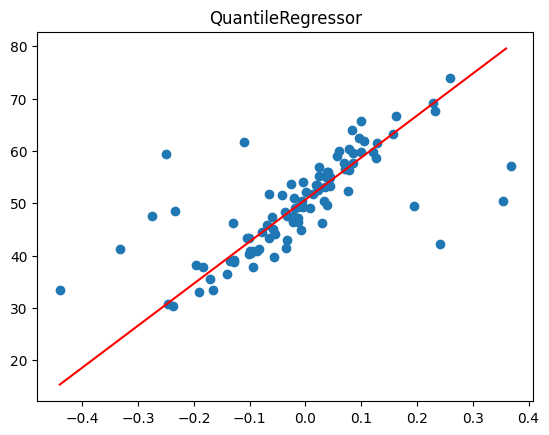

In [20]:
# define quantile regression model
model_QR = QuantileRegressor(quantile=0.5, alpha=0, solver = "highs")
# evaluate model
results = evaluate_model(X, y, model_QR)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_QR)

Below, compute and plot the histograms of the residuals for each model, and describe the differences you observe.

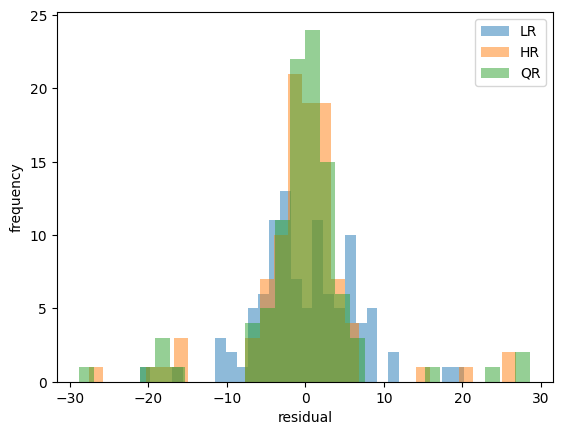

In [22]:
plt.hist(model_LR.predict(X) - y, bins = 30, alpha = 0.5, label = 'LR')
plt.hist(model_HR.predict(X) - y, bins = 30, alpha = 0.5, label = 'HR')
plt.hist(model_QR.predict(X) - y, bins = 30, alpha = 0.5, label = 'QR')
plt.xlabel("residual")
plt.ylabel("frequency")
plt.legend(loc='upper right')
plt.show()

Which of the three loss functions appears to be robust to outliers?  
How do you observe this robustness in the results?

Write your answer below.

In [ ]:
print("QR and HR are more robust to outliers than LR")